# Activation Functions in Neural Networks
<img src = "https://www.datajango.com/wp-content/uploads/2019/06/activation_fun-e1560521312732.jpg">


## **1. Role of Activation Functions**
- Activation functions decide whether a neuron should be activated or not by mapping the input to an output.
- They allow neural networks to model complex data patterns and relationships by introducing **non-linear transformations**.

---

## **2. Properties of Activation Functions**
- **Differentiability**: For backpropagation, the activation function must be differentiable.
- **Range of Output**: Different activation functions have different output ranges (e.g., `[0,1]`, `[-1,1]`).
- **Computational Efficiency**: Activation functions should be computationally efficient for faster training.
- **Non Linearity**: Functions should be non Linear in Nature
- **Zero Centered**: It should be normalized or zero centered
- **Non-Saturating**: functions which doesnot squeeze to fixed range
---
<img src = "https://www.researchgate.net/publication/350567223/figure/fig3/AS:1007855343767554@1617302847631/Fig-3-The-basic-activation-functions-of-the-neural-networksNeural-Networks.jpg">
---

---

## **3. Types of Activation Functions**

### **Linear Activation Function**
- **Equation**: \( f(x) = x \)
- **Pros**: Simple and interpretable.
- **Cons**: Cannot model non-linear relationships.


---

### **Sigmoid Function**
- **Equation**: \( f(x) = \frac{1}{1 + e^{-x}} \)
- **Range**: \( (0, 1) \)
- **Pros**: Useful for probability predictions.
- **Cons**: Vanishing gradient problem for large/small inputs.
   * Saturated function
   * vanishing Gradient problem
   * Only used for Output Layer in Binary Classification
   * Non Zero Centered - (slow training)
---

### **Hyperbolic Tangent (Tanh)**
- **Equation**: \( f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
- **Range**: \( (-1, 1) \)
- **Pros**:
   * Outputs are centered around 0. ie faster training
   * Non linear and Differentiable
*

- **Cons**: Suffers from vanishing gradient problems.
   * Saturating function - Squashing to fixed range
   * prone to vanishing Gradient problem
   * computationally expensive

---

### **Rectified Linear Unit (ReLU)**
- **Equation**: \( f(x) = \max(0, x) \)
- **Range**: \( [0, \infty) \)
- **Pros**:
   * Computationally efficient, helps prevent vanishing gradients.
   * Non Linear
   * Not Saturated in the positive region
   * It is Computationally inexpensive
   * Conversion is faster than sigmoid and tanh
   * Best for Hidden layers
- **Cons**:
   * "Dying ReLU" problem when many neurons output zero.
   * High learning rate
   * High Negative Bias
   * Not Differentiable at Zero
   * Not Zero Centered(we use batch normalizationto handle this)

---

### **Leaky ReLU**
- **Equation**: \( f(x) = x \text{ if } x > 0 \text{ else } \alpha x \), where \( \alpha \) is a small constant.
- **Pros**: Solves the "Dying ReLU" problem.
- **Cons**: Introduces a hyperparameter.

---

### **Softmax**
- **Equation**: \( f(x)_i = \frac{e^{x_i}}{\sum_j e^{x_j}} \)
- **Range**: \( (0, 1) \), and the outputs sum to 1.
- **Pros**: Used in multi-class classification problems.


# **HandsOn Implementation of Activation Functions in Deep Learning**

In [13]:
# Import required libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [14]:
# Create dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.98


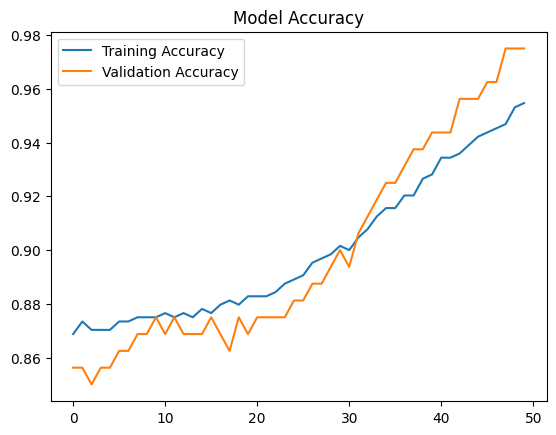

In [20]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()